#  Import Packages

In [1]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

* Ignore Warning from sklearn library

In [2]:
# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

#  Read Dataset & Info

In [3]:
ds = pd.read_csv("loan_satus.csv")

In [4]:
print(ds.shape)
ds.head(10)

(614, 13)


,Loan_ID,Gender,Married,Education,Property_Area,Loan_Status,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,Graduate,Urban,Y,No,0.0,5849,0.0,NaN,360.0,1.0
1,LP001003,Male,Yes,Graduate,Rural,N,No,1.0,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,Graduate,Urban,Y,Yes,0.0,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,Not Graduate,Urban,Y,No,0.0,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,Graduate,Urban,Y,No,0.0,6000,0.0,141.0,360.0,1.0
5,LP001011,Male,Yes,Graduate,Urban,Y,Yes,2.0,5417,4196.0,267.0,360.0,1.0
6,LP001013,Male,Yes,Not Graduate,Urban,Y,No,0.0,2333,1516.0,95.0,360.0,1.0
7,LP001014,Male,Yes,Graduate,Semiurban,N,No,NaN,3036,2504.0,158.0,360.0,0.0
8,LP001018,Male,Yes,Graduate,Urban,Y,No,2.0,4006,1526.0,168.0,360.0,1.0
9,LP001020,Male,Yes,Graduate,Semiurban,N,No,1.0,12841,10968.0,349.0,360.0,1.0


In [5]:
ds.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Property_Area',
 'Loan_Status',
 'Self_Employed',
 'Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [6]:
ds.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,585.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.519658,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,0.771966,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Education          614 non-null    object 
 4   Property_Area      614 non-null    object 
 5   Loan_Status        614 non-null    object 
 6   Self_Employed      582 non-null    object 
 7   Dependents         585 non-null    float64
 8   ApplicantIncome    614 non-null    int64  
 9   CoapplicantIncome  614 non-null    float64
 10  LoanAmount         592 non-null    float64
 11  Loan_Amount_Term   600 non-null    float64
 12  Credit_History     564 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [8]:
#Sum of NaN values
ds.isna().sum()

Loan_ID               0
Gender               13
Married               3
Education             0
Property_Area         0
Loan_Status           0
Self_Employed        32
Dependents           29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [9]:
print(ds.columns.tolist())

['Loan_ID', 'Gender', 'Married', 'Education', 'Property_Area', 'Loan_Status', 'Self_Employed', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


#  Data PreProcessing

In [10]:
nan = []

# Identify columns with NaN values
for column in ds.columns:
    if ds[column].isna().sum():
        nan.append(column)

print("Columns with NaN values:", nan)

# Iterate through columns with NaN values
for column in nan:
    # Check if the column has non-numeric values
    if ds[column].dtype == 'O':  # Object type (categorical)
        # Handle categorical columns (fill with the most frequent value)
        ds[column].fillna(ds[column].mode()[0], inplace=True)
    else:
        # Handle numeric columns (fill with the mean)
        ds[column].fillna(ds[column].mean(), inplace=True)

# Check if there are still NaN values
print(ds.isna().sum())


Columns with NaN values: ['Gender', 'Married', 'Self_Employed', 'Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Loan_ID              0
Gender               0
Married              0
Education            0
Property_Area        0
Loan_Status          0
Self_Employed        0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [11]:
ds.Gender.value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [12]:
encoder = LabelEncoder()
ds["Gender"]= encoder.fit_transform(ds["Gender"])

In [13]:
ds.Gender.value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

In [14]:
ds.Married.value_counts() 


Married
Yes    401
No     213
Name: count, dtype: int64

In [15]:
encoder = LabelEncoder()
ds["Married"]= encoder.fit_transform(ds["Married"])

In [16]:
ds.Married.value_counts() 

Married
1    401
0    213
Name: count, dtype: int64

In [17]:
ds.Education.value_counts() 

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [18]:
encoder = LabelEncoder()
ds["Education"]= encoder.fit_transform(ds["Education"])

In [19]:
ds.Education.value_counts() 

Education
0    480
1    134
Name: count, dtype: int64

In [20]:
ds.Self_Employed.value_counts() 

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [21]:
encoder = LabelEncoder()
ds["Self_Employed"]= encoder.fit_transform(ds["Self_Employed"])

In [22]:
ds.Self_Employed.value_counts() 

Self_Employed
0    532
1     82
Name: count, dtype: int64

In [23]:
ds.Property_Area.value_counts() 

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [24]:
encoder = LabelEncoder()
ds["Property_Area"]= encoder.fit_transform(ds["Property_Area"])

In [25]:
ds.Property_Area.value_counts() 

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

In [26]:
ds.Loan_Status.value_counts()        

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [27]:
encoder = LabelEncoder()
ds["Loan_Status"]= encoder.fit_transform(ds["Loan_Status"])

In [28]:
ds.Loan_Status.value_counts()    

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [29]:
encoder = LabelEncoder()
ds["Loan_ID"]= encoder.fit_transform(ds["Loan_ID"])

In [30]:
ds.Loan_ID.value_counts()  

Loan_ID
0      1
412    1
405    1
406    1
407    1
      ..
205    1
206    1
207    1
208    1
613    1
Name: count, Length: 614, dtype: int64

In [31]:
ds.head(20)

,Loan_ID,Gender,Married,Education,Property_Area,Loan_Status,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,2,1,0,0.000000,5849,0.0,146.412162,360.0,1.000000
1,1,1,1,0,0,0,0,1.000000,4583,1508.0,128.000000,360.0,1.000000
2,2,1,1,0,2,1,1,0.000000,3000,0.0,66.000000,360.0,1.000000
3,3,1,1,1,2,1,0,0.000000,2583,2358.0,120.000000,360.0,1.000000
4,4,1,0,0,2,1,0,0.000000,6000,0.0,141.000000,360.0,1.000000
5,5,1,1,0,2,1,1,2.000000,5417,4196.0,267.000000,360.0,1.000000
6,6,1,1,1,2,1,0,0.000000,2333,1516.0,95.000000,360.0,1.000000
7,7,1,1,0,1,0,0,0.519658,3036,2504.0,158.000000,360.0,0.000000
8,8,1,1,0,2,1,0,2.000000,4006,1526.0,168.000000,360.0,1.000000
9,9,1,1,0,1,0,0,1.000000,12841,10968.0,349.000000,360.0,1.000000


#  **Model**

In [32]:
X = ds.drop('Loan_Status', axis=1)
y = ds['Loan_Status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Prediction

In [38]:
# Predict New Values:
new_data_scaled = scaler.transform([[7,1,1,0,1,0,0.519658,3036,2504.0,158.000000,360.0,0.000000]])
new_predictions = classifier.predict(new_data_scaled)
print(new_predictions)

[0]


# Evaluation

In [39]:
print(f'Accuracy: {accuracy:.2f}')
print('classification report:\n', classification_report_result)

Accuracy: 0.80
classification report:
               precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



# Visualisation

In [40]:
con_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:" , "\n")
print(con_matrix , "\n")


Confusion Matrix: 

[[19 24]
 [ 1 79]] 



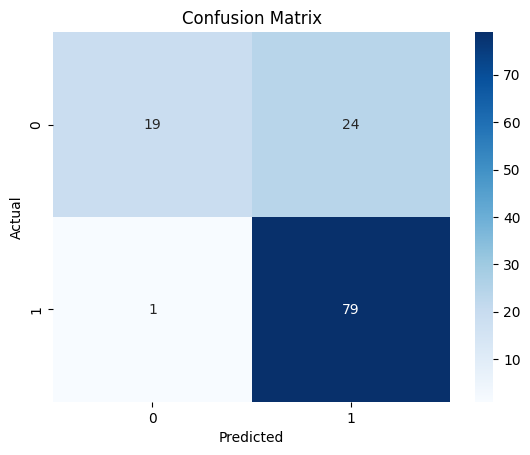

In [41]:
# Visualize confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

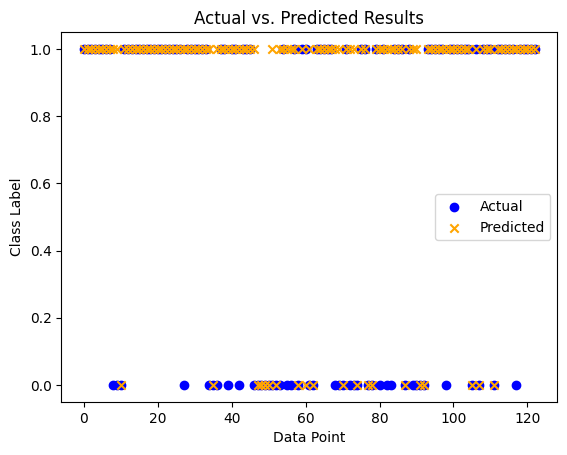

In [42]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='orange', marker='x', label='Predicted')
plt.xlabel("Data Point")
plt.ylabel("Class Label")
plt.title("Actual vs. Predicted Results")
plt.legend()
plt.show()